## 初始化

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')

print(sys.path)

['/mnt/workspace/code/agent/demo', '/opt/conda/lib/python38.zip', '/opt/conda/lib/python3.8', '/opt/conda/lib/python3.8/lib-dynload', '', '/opt/conda/lib/python3.8/site-packages', '/opt/conda/lib/python3.8/site-packages/MultiScaleDeformableAttention-1.0-py3.8-linux-x86_64.egg', '/opt/conda/lib/python3.8/site-packages/tinycudann-1.6-py3.8-linux-x86_64.egg', '/mnt/workspace/code/swift/package', '../']


## Load cfg and initialize

In [3]:
from dotenv import load_dotenv

load_dotenv('../config/.env', override=True)

import os
from modelscope.utils.config import Config

model_cfg_file = os.getenv('LLM_CONFIG_FILE')
tool_cfg_file = os.getenv('TOOL_CONFIG_FILE') 
model_name = 'ms_gpt'

print(model_cfg_file)
print(tool_cfg_file)

model_cfg = Config.from_file(model_cfg_file)
tool_cfg = Config.from_file(tool_cfg_file)

2023-09-04 20:08:48,520 - modelscope - INFO - PyTorch version 2.0.1+cu117 Found.
2023-09-04 20:08:48,569 - modelscope - INFO - Loading ast index from /mnt/workspace/.cache/modelscope/ast_indexer
2023-09-04 20:08:48,679 - modelscope - INFO - Loading done! Current index file version is 1.8.4, with md5 19a5f85d75c8eaa96a7eba32b8e082cb and a total number of 902 components indexed


../config/cfg_model.json
../config/cfg_tool_new.json


In [4]:
from modelscope_agent.agent import AgentExecutor
from modelscope_agent.llm import LLMFactory

llm = LLMFactory.build_llm(model_name, model_cfg)
agent = AgentExecutor(llm, tool_cfg)

[2023-09-04 20:08:57,279] [INFO] [real_accelerator.py:133:get_accelerator] Setting ds_accelerator to cuda (auto detect)


2023-09-04 20:08:58.405146: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Retrying langchain.embeddings.dashscope.embed_with_retry.<locals>._embed_with_retry in 1.0 seconds as it raised HTTPError: HTTP error occurred: status_code: 503 
 code: Unknown 
 message: upstream connect error or disconnect/reset before headers. reset reason: connection failure.


## 视频生成

In [5]:
available_tool_list = [
    'modelscope_text-translation-zh2en',
    'modelscope_video-generation'
]
agent.set_available_tools(available_tool_list)

In [6]:
agent.reset()
agent.run("调用插件，生成一段两只小猫一起跳舞的视频", remote=True)

**************************************************round 1**************************************************

<IPython.core.display.JSON object>

目前ModelScope只有支持英文的多模态类ChatGPT的LLM，名字叫mGeex，所以我将首先把您的问题利用ModelScope的中英翻译模型转化为英文，然后再调用英文的mGeex模型

**************************************************round 2**************************************************

<IPython.core.display.JSON object>

翻译后的指令：Video of two kittens dancing together

调用mGeex返回结果：


**************************************************round 3**************************************************

![IMAGEGEN](https://modelscope-studios.oss-cn-zhangjiakou.aliyuncs.com/modelscope-agent%2FAI-ModelScope%2Fstable-diffusion-xl-base-1.0%2Fagent_result_1c2d936c4b1c11ee93c9827b6120a4e2.png?OSSAccessKeyId=LTAI5tJhCqC1dBhCuG9MkASX&Expires=1693833060&Signature=UABllipbhVBF3VPbimIQC0AOSfM%3D)

[{'text': 'Video of two kittens dancing together'},
 {'result': ![IMAGEGEN](https://modelscope-studios.oss-cn-zhangjiakou.aliyuncs.com/modelscope-agent%2FAI-ModelScope%2Fstable-diffusion-xl-base-1.0%2Fagent_result_1c2d936c4b1c11ee93c9827b6120a4e2.png?OSSAccessKeyId=LTAI5tJhCqC1dBhCuG9MkASX&Expires=1693833060&Signature=UABllipbhVBF3VPbimIQC0AOSfM%3D)}]

**************************************************round 1**************************************************

<IPython.core.display.JSON object>

调用ModelScope的图片生成模型生成中...


2023-09-04 20:11:46,509 - modelscope - INFO - Use user-specified model revision: v1.0.0
The config attributes {'force_upcast': True} were passed to AutoencoderKL, but are not expected and will be ignored. Please verify your config.json configuration file.
Token indices sequence length is longer than the specified maximum sequence length for this model (155 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['颜色清亮, 色彩饱和度高, 分辨率高, 抽象表现主义风格, 光线柔和 。']
Token indices sequence length is longer than the specified maximum sequence length for this model (155 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['颜色清亮, 色彩饱和度高, 分辨率高, 抽象表现主义风格, 光线柔和 。']


  0%|          | 0/50 [00:00<?, ?it/s]

**************************************************round 2**************************************************

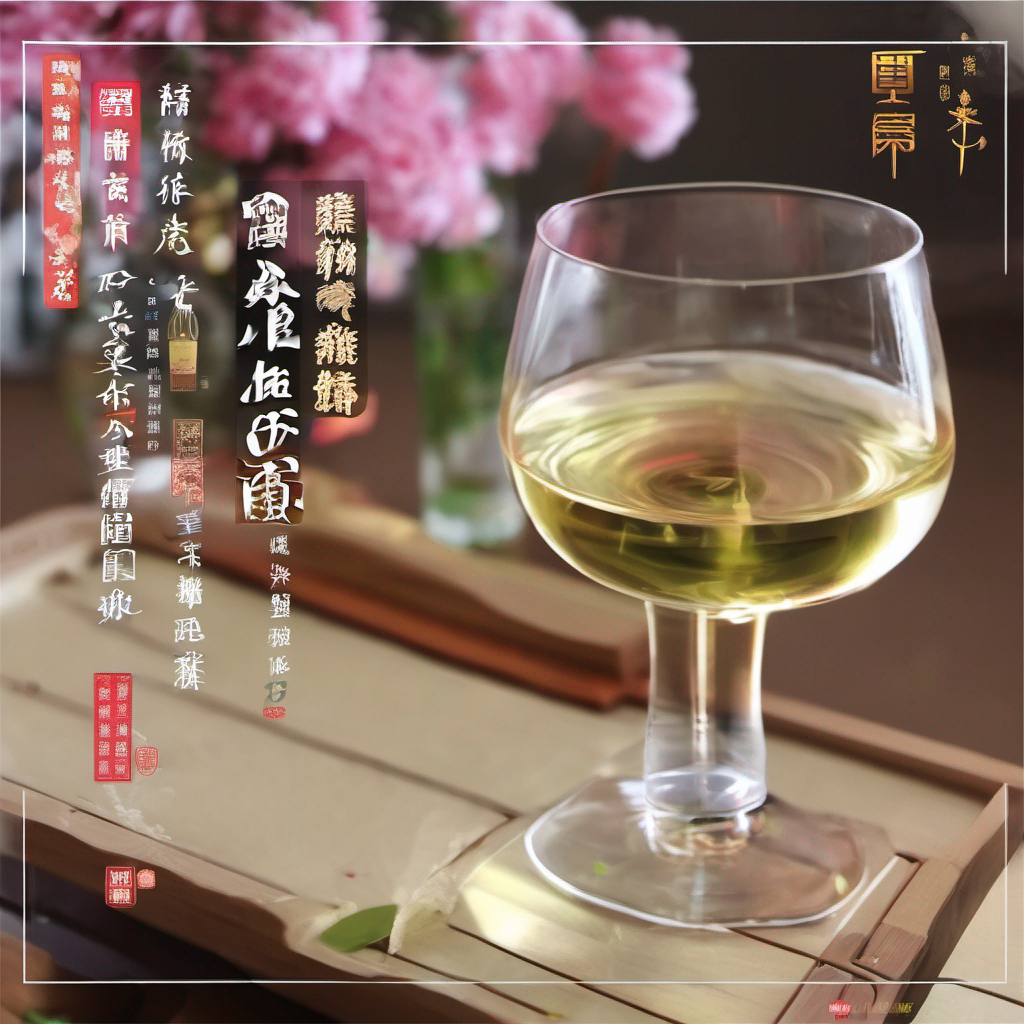

图片已生成，这是您要的图片：

[{'result': ![IMAGEGEN](./tmp/tmpfbig0xqm/6b53a7ed-db5a-4238-a59a-7a44bc5d6dac.png)}]

In [8]:

agent.reset()
agent.run("生成一张有花有酒的图片")